<a href="https://colab.research.google.com/gist/jonghank/ecfdb01d7919c47f6c466329f8263a5f/huber_regression_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Huber regression

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\argmin}{{\text{argmin}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\E}{\mathbf{E}}
\newcommand{\var}{\mathbf{var}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\B}{\mathbf{B}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\onev}{\mathbf{1}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> ASE7030: Convex Optimization, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_


<br>

---

### Standard regression

<br>

In a standard regression problem we are given data $(x_i,y_i)\in \R^d \times \R$, $i=1,\ldots, n$, and fit a linear (affine) model

$$\hat y_i = \theta ^T x_i + b$$

where $\theta \in\R^d$ and $b \in {\bf R}$.

<br>

The residuals are $r_i = \hat y_i - y_i$.
In standard (least-squares) regression we choose $\theta$ and $b$ to minimize $\|r\|_2^2 = \sum_i r_i^2$.
For this choice of $\theta$ and $b$ the mean of the optimal residuals is zero.

In a vector form, we can write the problem as

$$
\hat{y} = \bmat{X & \onev}\bmat{\theta \\ b} 
$$

where

$$ 
X = \bmat{x_1^T \\ x_2^T \\ \vdots \\ x_n^T}\in\R^{n\times d}
$$

<br>

So the problem is to find $\theta\in\R^d$ and $b\in\R$ for

$$
\begin{aligned}
  \underset{\theta, b}{\minimize} \quad & \|X\theta + \onev b - y\|^2
\end{aligned}
$$

A simple variant is to add (Tikhonov) regularization, meaning we solve the optimization problem

$$\begin{array}{ll}
\mbox{minimize} & \|X\theta + \onev b - y\|_2^2 + \lambda \|\theta \|_2^2,
\end{array}$$

with some $\lambda>0$.

<br>

---

### Robust (Huber) regression

<br>

A more sophisticated variant is to replace the square function, $\|X\theta + \onev b - y\|_2^2$, with the _Huber function_

$$
h_\rho(x) = \begin{cases}
x^2 &\quad \text{if } |x| \le \rho \\
\rho\left(2|x|-\rho\right) &\quad \text{if }|x| \gt \rho
\end{cases}
$$ 

where $\rho>0$ is the Huber threshold.
The image below shows the square function on the left and the Huber function on the right.


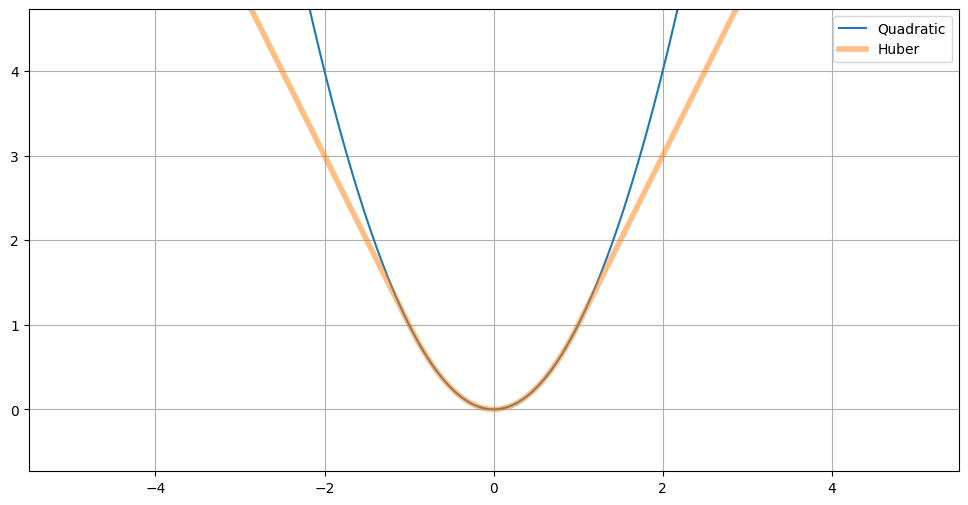

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import huber

x_test = np.linspace(-5,5,500)
plt.figure(figsize=(12,6), dpi=100)
plt.plot(x_test,x_test**2, label='Quadratic')
plt.plot(x_test,2*huber(1,x_test), linewidth=4, alpha=0.5, label='Huber')
plt.axis('equal')
plt.legend()
plt.ylim(0,4)
plt.grid()
plt.show()

<br>


Huber regression is the same as standard (least-squares) regression for small residuals, but allows (some)
large residuals.

<br>

---

### Numerical example

<br>

In the following code we do a numerical example of Huber regression.

<br>

We generate $n=450$ measurements with $d=300$ feasures.

We randomly choose $\theta^\text{true}$, $b^\text{true}$, and $x_i \sim \mc N(0,I)$.

We set $y_i = (\theta^\text{true})^Tx_i + b^\text{true} + \epsilon_i$, where $\epsilon_i \sim \mc N(0,1)$ represents the measurement noise.

<br>

_Then all kinds of nasty things come in; we replace $y_i$ with $-y_i$ with probability $p$._

_The data has fraction $p$ of (non-obvious) wrong measurements.The distribution of "good" and "bad" $y_i$ are the same._

<br>

Our goal is to recover $\theta^\text{true} \in\R^d$ and $b^\text{true} \in\R$ from the measurements $y\in \R^n$.
We compare three approaches: 

- Standard regression (least squares) 
- Huber regression
- "Prescient" regression, where we know which measurements had their sign flipped.

<br>

Note that the "prescient" approach should be equivalent to "no-flip" case ($p=0$), since knowing the flipped measurements implies that we can re-flip those to recover the original unflipped signals. So the perfornance of the "prescient" approaches with different $p$'s should be identical for all $p$'s.

<br>

We generate $50$ problem instances, with $p$ varying from $0$ to $0.15$, and plot the relative error in reconstructing $\theta^\text{true}$ for the three approaches.

In [3]:
np.random.seed(7030)
d = 300
n = int(1.5*d)
theta_true = np.random.randn(d)
b_true = np.random.randn()
X = np.random.randn(n,d)
v = 1*np.random.randn(n)
onev = np.ones(n)

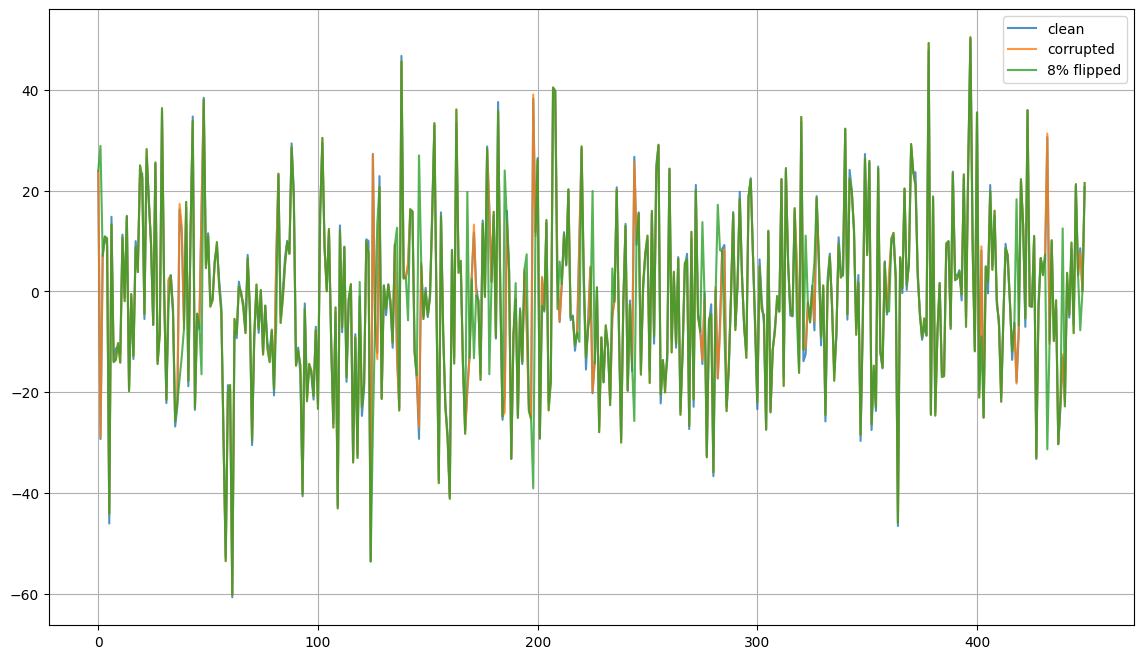

In [4]:
y_clean = X.dot(theta_true)
y_corrupted = y_clean + v
p = 0.08
factor = 2*np.random.binomial(1, 1-p, size=(n,)) - 1
y_flipped = factor*y_corrupted

plt.figure(figsize=(14,8), dpi=100)
plt.plot(y_clean, alpha=0.8, label='clean')
plt.plot(y_corrupted, alpha=0.8, label='corrupted')
plt.plot(y_flipped, alpha=0.8, label='8% flipped')
plt.legend(), plt.grid()
plt.show()

In [7]:
import cvxpy as cp

TESTS = 100
lsq_data = np.zeros(TESTS)
huber_data = np.zeros(TESTS)
prescient_data = np.zeros(TESTS)
p_vals = np.linspace(0, 0.15, TESTS)

for idx, p in enumerate(p_vals):
  print (idx, end=' ')
  if idx%20==19:
    print ()
  # Generate the sign changes.
  factor = 2*np.random.binomial(1, 1-p, size=(n,)) - 1
  y = factor*(X.dot(theta_true)+onev*b_true + v)
    
  # Form and solve a standard regression problem.
  theta = cp.Variable(d)
  b = cp.Variable()
  fit = cp.norm(theta - theta_true)/cp.norm(theta_true)
  cost = cp.norm(X@theta + onev*b - y)
  prob = cp.Problem(cp.Minimize(cost))
  prob.solve()
  lsq_data[idx] = fit.value
    
  # Form and solve a prescient regression problem,
  # i.e., where the sign changes are known.
  cost = cp.norm(cp.multiply(factor, X@theta + onev*b) - y)
  prob = cp.Problem(cp.Minimize(cost))
  prob.solve()
  prescient_data[idx] = fit.value
    
  # Form and solve the Huber regression problem.
  cost = cp.sum(cp.huber(X@theta + onev*b - y, 1))
  prob = cp.Problem(cp.Minimize(cost))
  prob.solve()
  huber_data[idx] = fit.value

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 
20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 
40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 
60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 
80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 


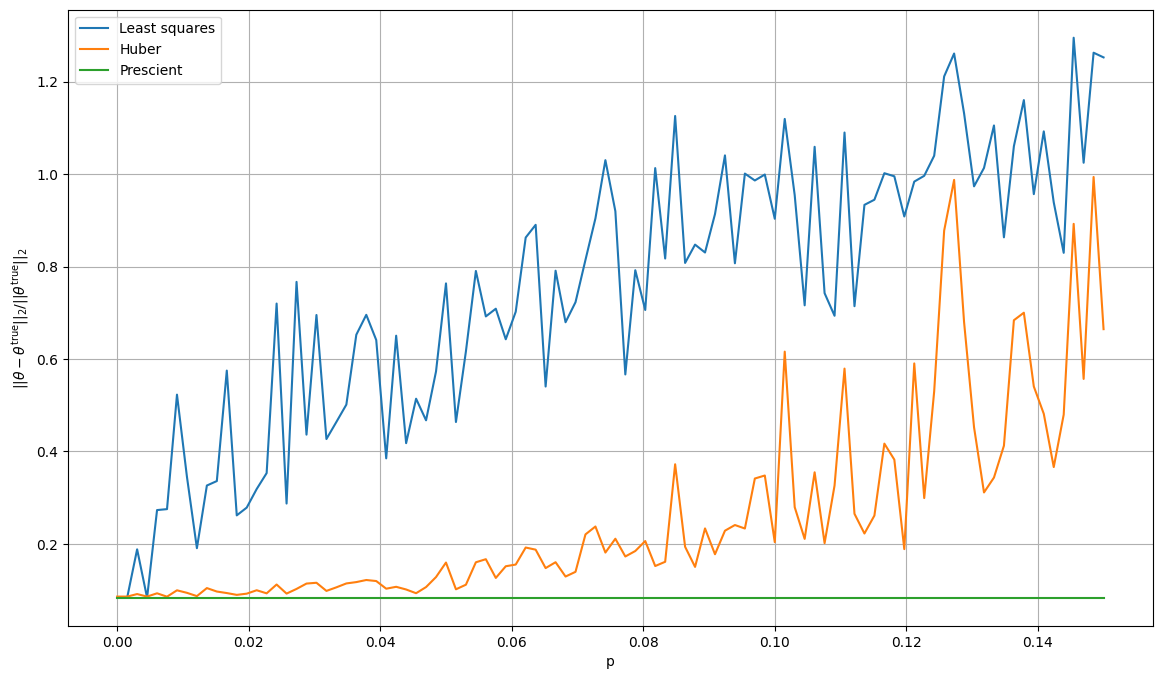

In [8]:
plt.figure(figsize=(14,8), dpi=100)
plt.plot(p_vals, lsq_data, label='Least squares')
plt.plot(p_vals, huber_data, label='Huber')
plt.plot(p_vals, prescient_data, label='Prescient')
plt.ylabel(r'$||\theta - \theta^\mathrm{true} ||_2/ ||\theta^\mathrm{true} ||_2$')
plt.xlabel('p')
plt.grid()
plt.legend()
plt.show()

<br>

Notice that in the range $p \in [0,0.06]$, Huber regression almost matches prescient regression. Standard regression, by contrast, fails even for very small $p$.